/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


convergence iteration:  0
convergence iteration:  1
convergence iteration:  2
convergence iteration:  3
convergence iteration:  4
convergence iteration:  5
convergence iteration:  6
convergence iteration:  7
convergence iteration:  8
convergence iteration:  9
convergence iteration:  10
convergence iteration:  11
convergence iteration:  12
convergence iteration:  13
convergence iteration:  14
convergence iteration:  15
convergence iteration:  16
convergence iteration:  17
convergence iteration:  18
convergence iteration:  19
convergence iteration:  20
convergence iteration:  21
convergence iteration:  22
convergence iteration:  23
convergence iteration:  24
convergence iteration:  25
convergence iteration:  26
convergence iteration:  27
convergence iteration:  28
convergence iteration:  29
convergence iteration:  30
convergence iteration:  31
convergence iteration:  32
convergence iteration:  33
convergence iteration:  34
convergence iteration:  35
convergence iteration:  36
convergence

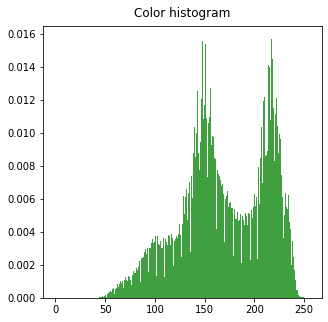

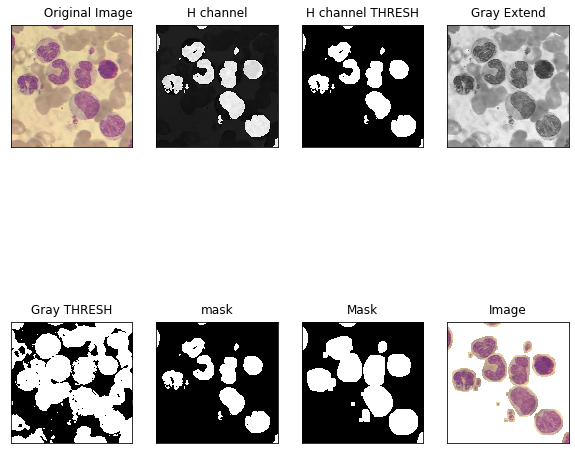

In [22]:
from skimage import data,filters
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
from skimage import data,filters
from scipy.optimize import fmin,fminbound
import sys
# one dimension golden search
def golden(*args):
    if not('a' in dir()):
        a=[]
        b=[]
        
    a.append(args[0])
    b.append(args[1])
    img_cv = args[2]
    model = args[3]
    x = np.linspace(0, 255, 256).astype(np.int)
    MAX = 255
    MIN = 0
    # img1为BGR
    
    
    
    #print(x)
    if model == 'gray':
        B, G, R = cv2.split(img_cv)  #分离函数
        gray = 0.333 * B + 0.333 * G + 0.333 * R
        Imax = np.max(gray)
        Imin = np.min(gray)
        farina_cs = (gray - Imin) / (Imax - Imin) * (MAX - MIN) + MIN
        img=np.array(farina_cs)##################################################################################3
    if model == 'HSV':
        HSV = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
        H, S, V = cv2.split(HSV)
        Hmax = np.max(H)
        Hmin = np.min(H)
        H = (H - Hmin) / (Hmax - Hmin) * (MAX - MIN) + MIN
        H = H.astype("uint8")
        img=np.array(H)##################################################################################3
    #plt.figure(figsize=(40, 40))
       
    
    

    
    
    arr=img.flatten()
    plt.figure(figsize=(5, 5))
    plt.title("Color histogram",verticalalignment='bottom')
    fun, bins, patches = plt.hist(arr, bins=256, normed=1, facecolor='green', alpha=0.75)
    #n = x*x+2*x - 3
    #plt.show()
    L=1e-6  # tolrence for convergence
    n=80   # max steps for iteration
    #a,b is the region containing opt point
    lambda1=a[0]+0.382*(b[0]-a[0])
    miu1=a[0]+0.618*(b[0]-a[0])
    #lambda1 miu1 is the test point of golden search method
    for k in range(0,n):
        print("convergence iteration: ",k)
        if abs(b[k]-a[k])<=L:
            print("convergence succeed!!")
            solve=(a[k]+b[k])/2
            break
        f_lambda1=fun[int(lambda1)]
        f_miu1=fun[int(miu1)]
        if f_lambda1>f_miu1:
            a.append(lambda1)
            b.append(b[k])
            lambda2=miu1
            miu2=a[k+1]+0.618*(b[k+1]-a[k+1])
        else:
            a.append(a[k])
            b.append(miu1)
            miu2=lambda1
            lambda2=a[k+1]+0.382*(b[k+1]-a[k+1])
        lambda1=lambda2
        miu1=miu2
    print('optimum point  is ：',solve)
    return solve





MAX = 255
MIN = 0
img_cv = cv2.imread('/notebooks/storage/OKK/OKK/VOCdevkit/JPEGImages/516.jpg')
#
# img1为BGR
height, width ,channel= img_cv.shape

HSV = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(HSV)
b, g, r = cv2.split(img_cv)  #分离函数
zeros = np.zeros(img_cv.shape[:2],dtype="uint8")
gray = 0.333 * b + 0.333 * g + 0.333 * r
gray = gray.astype(np.uint8)

hist_full = cv2.calcHist([gray], [0], None, [256], [0, 256])
Imax = np.max(gray)
Imin = np.min(gray)
Hmax = np.max(H)
Hmin = np.min(H)

H = (H - Hmin) / (Hmax - Hmin) * (MAX - MIN) + MIN
H = H.astype("uint8")
ret, H_th = cv2.threshold(H, 127, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU) #H通道阈值之后 第一阈值
#ret, H_th = cv2.threshold(H, int(golden(150,200,img_cv,'HSV')), 255, cv2.THRESH_TOZERO_INV) #H通道阈值之后 第一阈值
H_th = H_th.astype("uint8")
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13, 13))
#开闭运算，先开运算去除背景噪声，再继续闭运算填充目标内的孔洞
#H_th = cv2.morphologyEx(H_th, cv2.MORPH_OPEN, kernel)
#H_th = cv2.morphologyEx(H_th, cv2.MORPH_CLOSE, kernel)


farina_cs = (gray - Imin) / (Imax - Imin) * (MAX - MIN) + MIN
farina_cs = farina_cs.astype("uint8")
#dst = cv2.adaptiveThreshold(farina_cs,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,191,2)
ret, dst = cv2.threshold(farina_cs,int(golden(150,200,img_cv,'gray')), 255, cv2.THRESH_BINARY_INV) #第二阈值
dst = dst.astype("uint8")

#dest = cv2.bitwise_and(dst,H_th)#intersection
dest= cv2.bitwise_and(dst, dst,mask=H_th)

#cv2.imshow("dst", dst.astype("uint8"))
ret, final = cv2.threshold(dest,127 , 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(23,23))





ret,thresh2 = cv2.threshold(final,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)  # 大津阈值               
                
contours, hierarchy  = cv2.findContours(thresh2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)  #cv2.RETR_EXTERNAL 定义只检测外围轮廓
image_copy = img_cv.copy()
for i in range(len(contours)):
    hull_points = cv2.convexHull(contours[i])

    cv2.fillConvexPoly(image_copy, hull_points, (0, 0, 0))
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)
ret, Mask= cv2.threshold(image_copy, 2, 255, cv2.THRESH_BINARY) #H通道阈值之后 第一阈值
ret, Mask= cv2.threshold(Mask, 0, 255, cv2.THRESH_BINARY_INV) #H通道阈值之后 第一阈值
Mask = cv2.dilate(Mask,kernel)      #膨胀图像
Mask = cv2.medianBlur(Mask,3)
Mask = Mask.astype("uint8")
img_cv = img_cv.astype("uint8")
image= cv2.add(img_cv, np.zeros(np.shape(img_cv), dtype=np.uint8), mask=Mask)
height, width ,channel= image.shape
for row in range(height):
    for list in range(width):
        for c in range(channel):
            if image[row, list,c] == 0:
                image[row, list,c] = 255

titles = ['         Original Image', 'H channel',
            'H channel THRESH', 'Gray Extend','Gray THRESH','mask','Mask','Image']
img1 = img_cv[...,::-1]#BGR转RGB'
image1 = image[...,::-1]
images = [img1, H, H_th, farina_cs,dst,dest,Mask,image1]
plt.figure(figsize=(10, 10))
for i in range(8):
    
    plt.subplot(2,4,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i],verticalalignment='bottom')
    plt.xticks([]),plt.yticks([])
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


convergence iteration:  0
convergence iteration:  1
convergence iteration:  2
convergence iteration:  3
convergence iteration:  4
convergence iteration:  5
convergence iteration:  6
convergence iteration:  7
convergence iteration:  8
convergence iteration:  9
convergence iteration:  10
convergence iteration:  11
convergence iteration:  12
convergence iteration:  13
convergence iteration:  14
convergence iteration:  15
convergence iteration:  16
convergence iteration:  17
convergence iteration:  18
convergence iteration:  19
convergence iteration:  20
convergence iteration:  21
convergence iteration:  22
convergence iteration:  23
convergence iteration:  24
convergence iteration:  25
convergence iteration:  26
convergence iteration:  27
convergence iteration:  28
convergence iteration:  29
convergence iteration:  30
convergence iteration:  31
convergence iteration:  32
convergence iteration:  33
convergence iteration:  34
convergence iteration:  35
convergence iteration:  36
convergence

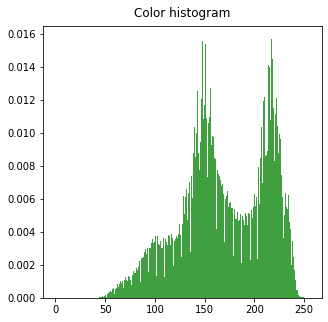

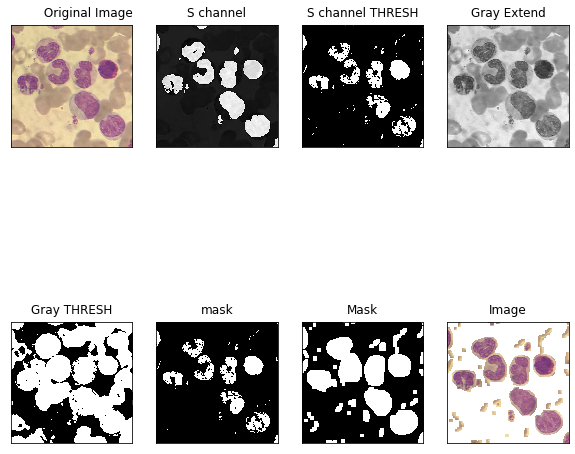

In [9]:
from skimage import data,filters
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
from skimage import data,filters
from scipy.optimize import fmin,fminbound
import sys
# one dimension golden search
def golden(*args):
    if not('a' in dir()):
        a=[]
        b=[]
        
    a.append(args[0])
    b.append(args[1])
    img_cv = args[2]
    model = args[3]
    x = np.linspace(0, 255, 256).astype(np.int)
    MAX = 255
    MIN = 0
    # img1为BGR
    
    
    
    #print(x)
    if model == 'gray':
        B, G, R = cv2.split(img_cv)  #分离函数
        gray = 0.333 * B + 0.333 * G + 0.333 * R
        Imax = np.max(gray)
        Imin = np.min(gray)
        farina_cs = (gray - Imin) / (Imax - Imin) * (MAX - MIN) + MIN
        img=np.array(farina_cs)##################################################################################3
    if model == 'HSV':
        HSV = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
        H, S, V = cv2.split(HSV)
        Hmax = np.max(H)
        Hmin = np.min(H)
        H = (H - Hmin) / (Hmax - Hmin) * (MAX - MIN) + MIN
        H = H.astype("uint8")
        img=np.array(H)##################################################################################3
    #plt.figure(figsize=(40, 40))
       
    
    

    
    
    arr=img.flatten()
    plt.figure(figsize=(5, 5))
    plt.title("Color histogram",verticalalignment='bottom')
    fun, bins, patches = plt.hist(arr, bins=256, normed=1, facecolor='green', alpha=0.75)
    #n = x*x+2*x - 3
    #plt.show()
    L=1e-6  # tolrence for convergence
    n=80   # max steps for iteration
    #a,b is the region containing opt point
    lambda1=a[0]+0.382*(b[0]-a[0])
    miu1=a[0]+0.618*(b[0]-a[0])
    #lambda1 miu1 is the test point of golden search method
    for k in range(0,n):
        print("convergence iteration: ",k)
        if abs(b[k]-a[k])<=L:
            print("convergence succeed!!")
            solve=(a[k]+b[k])/2
            break
        f_lambda1=fun[int(lambda1)]
        f_miu1=fun[int(miu1)]
        if f_lambda1>f_miu1:
            a.append(lambda1)
            b.append(b[k])
            lambda2=miu1
            miu2=a[k+1]+0.618*(b[k+1]-a[k+1])
        else:
            a.append(a[k])
            b.append(miu1)
            miu2=lambda1
            lambda2=a[k+1]+0.382*(b[k+1]-a[k+1])
        lambda1=lambda2
        miu1=miu2
    print('optimum point  is ：',solve)
    return solve





MAX = 255
MIN = 0
img_cv = cv2.imread('/notebooks/storage/OKK/OKK/VOCdevkit/JPEGImages/516.jpg')
#
# img1为BGR
height, width ,channel= img_cv.shape

HSV = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(HSV)
b, g, r = cv2.split(img_cv)  #分离函数
zeros = np.zeros(img_cv.shape[:2],dtype="uint8")
gray = 0.333 * b + 0.333 * g + 0.333 * r
gray = gray.astype(np.uint8)

hist_full = cv2.calcHist([gray], [0], None, [256], [0, 256])
Imax = np.max(gray)
Imin = np.min(gray)

ret, S_th = cv2.threshold(S, 40, 255, cv2.THRESH_OTSU) #H通道阈值之后 第一阈值
#ret, H_th = cv2.threshold(H, int(golden(150,200,img_cv,'HSV')), 255, cv2.THRESH_TOZERO_INV) #H通道阈值之后 第一阈值
S_th = S_th.astype("uint8")



farina_cs = (gray - Imin) / (Imax - Imin) * (MAX - MIN) + MIN
farina_cs = farina_cs.astype("uint8")
ret, dst = cv2.threshold(farina_cs,int(golden(150,200,img_cv,'gray')), 255, cv2.THRESH_BINARY_INV) #第二阈值
dst = dst.astype("uint8")
dest= cv2.bitwise_and(dst, dst,mask=S_th)
ret, final = cv2.threshold(dest,127 , 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(23,23))
ret,thresh2 = cv2.threshold(final,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)  # 大津阈值                             
contours, hierarchy  = cv2.findContours(thresh2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)  #cv2.RETR_EXTERNAL 定义只检测外围轮廓
image_copy = img_cv.copy()
for i in range(len(contours)):
    hull_points = cv2.convexHull(contours[i])

    cv2.fillConvexPoly(image_copy, hull_points, (0, 0, 0))
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)
ret, Mask= cv2.threshold(image_copy, 2, 255, cv2.THRESH_BINARY) #H通道阈值之后 第一阈值
ret, Mask= cv2.threshold(Mask, 0, 255, cv2.THRESH_BINARY_INV) #H通道阈值之后 第一阈值
Mask = cv2.dilate(Mask,kernel)      #膨胀图像
Mask = cv2.medianBlur(Mask,3)
Mask = Mask.astype("uint8")
img_cv = img_cv.astype("uint8")
image= cv2.add(img_cv, np.zeros(np.shape(img_cv), dtype=np.uint8), mask=Mask)
height, width ,channel= image.shape
for row in range(height):
    for list in range(width):
        for c in range(channel):
            if image[row, list,c] == 0:
                image[row, list,c] = 255

titles = ['         Original Image', 'S channel',
            'S channel THRESH', 'Gray Extend','Gray THRESH','mask','Mask','Image']
img1 = img_cv[...,::-1]#BGR转RGB'
image1 = image[...,::-1]
images = [img1, H, S_th, farina_cs,dst,dest,Mask,image1]
plt.figure(figsize=(10, 10))
for i in range(8):
    
    plt.subplot(2,4,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i],verticalalignment='bottom')
    plt.xticks([]),plt.yticks([])
plt.show()


In [1]:
!python /notebooks/storage/cute-animal-detector/fetch-data.py

creepies
ungulate


In [3]:
!nvidia-smi

Wed Aug 11 21:56:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.78       Driver Version: 410.78       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  On   | 00000000:03:00.0  On |                  N/A |
| 23%   26C    P8     9W / 250W |     34MiB / 11176MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  On   | 00000000:04:00.0 Off |                  N/A |
| 23%   36C    P8    17W / 250W |      2MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G